In [74]:
import pycaret
import pandas as pd

In [101]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pycaretSub = pd.read_csv('pycaret_submission.csv')

In [76]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [77]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [78]:
data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1314, 81)
Unseen Data For Predictions: (146, 81)


In [79]:
from pycaret.regression import *

In [80]:
reg = setup(data=df, 
            target='SalePrice',
            numeric_imputation='mean',
            categorical_features=['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                  'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
                                  'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                  'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                  'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                  'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive', 
                                  'SaleCondition'],
            ignore_features=['Alley','PoolQC','Fence','Utilities'],
            normalize=True,
            silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7941
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [81]:
#compare_models(blacklist = None, fold = 4,  round = 2, turbo = True)

In [82]:
create_model('lr', fold = 10, round = 4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.892600e+13,1.130455e+29,3.362224e+14,-1.363474e+19,6.0714,4.924691e+08
1,1.055394e+13,1.017656e+28,1.008789e+14,-1.595514e+18,2.9103,3.465009e+07
2,7.689427e+13,1.071418e+29,3.273252e+14,-1.081418e+19,7.1578,7.977986e+08
3,1.243066e+13,7.573529e+27,8.702603e+13,-1.137533e+18,4.5295,5.443528e+07
4,1.853573e+13,1.291298e+28,1.136353e+14,-2.990168e+18,4.7564,1.815913e+08
5,4.031091e+13,1.051694e+29,3.242983e+14,-2.945095e+19,4.3274,3.391934e+08
6,1.846407e+14,1.231262e+30,1.109622e+15,-2.605502e+20,4.8370,2.096347e+09
7,1.447086e+13,9.675911e+27,9.836621e+13,-1.193171e+18,3.6856,7.755996e+07
8,1.752172e+13,1.455278e+28,1.206349e+14,-2.364107e+18,3.7068,2.317839e+08
9,7.747735e+13,3.302243e+29,5.746515e+14,-4.498144e+19,5.2106,3.857241e+08


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
create_model('lasso', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27131.4798,6.273702e+09,79206.7020,0.2433,0.2495,0.1680
1,19425.2122,7.541890e+08,27462.5009,0.8818,0.1642,0.1186
2,21462.2204,1.264758e+09,35563.4432,0.8723,0.4355,0.1304
3,22367.3667,1.393181e+09,37325.3456,0.7907,0.2033,0.1151
4,22729.8086,2.829292e+09,53191.0932,0.3448,0.2117,0.1503
5,19965.3257,8.803993e+08,29671.5235,0.7535,0.2477,0.1264
6,19989.4790,2.433093e+09,49326.3889,0.4851,0.2381,0.1203
7,23558.7293,1.427547e+09,37782.8882,0.8240,0.4671,0.1436
8,17312.9125,7.119185e+08,26681.8008,0.8843,0.1647,0.1081
9,15926.5348,5.625095e+08,23717.2829,0.9234,0.1296,0.0903


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=7941,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
create_model('ridge', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23139.2873,5.401786e+09,73496.8458,0.3485,0.2186,0.1407
1,19612.3164,8.094215e+08,28450.3344,0.8731,0.1641,0.1177
2,24118.9820,2.027851e+09,45031.6613,0.7953,0.2097,0.1375
3,21840.5031,1.358144e+09,36852.9986,0.7960,0.1735,0.1108
4,20719.4468,2.348861e+09,48465.0544,0.4561,0.2167,0.1319
5,22005.1594,1.231116e+09,35087.2684,0.6552,0.2258,0.1331
6,18246.8604,8.275476e+08,28767.1279,0.8249,0.1701,0.1197
7,22524.1957,1.272532e+09,35672.5674,0.8431,0.2145,0.1245
8,17169.9115,5.880729e+08,24250.2149,0.9045,0.1400,0.1052
9,17183.6920,5.930515e+08,24352.6485,0.9192,0.1497,0.1007


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=7941, solver='auto', tol=0.001)

In [85]:
#Elastic Net
create_model('en', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27841.3216,4.423808e+09,66511.7153,0.4664,0.2093,0.1491
1,22040.9377,1.060279e+09,32561.9310,0.8338,0.1686,0.1238
2,25818.0377,2.748757e+09,52428.5926,0.7226,0.2070,0.1423
3,19370.1499,1.432337e+09,37846.2335,0.7849,0.1487,0.1027
4,20126.4105,1.735504e+09,41659.3767,0.5981,0.1850,0.1321
5,16799.5562,6.000987e+08,24496.9120,0.8320,0.1251,0.0975
6,18018.5036,6.706185e+08,25896.3032,0.8581,0.1518,0.1141
7,21663.1191,1.281558e+09,35798.8563,0.8420,0.1685,0.1261
8,17009.2456,6.423181e+08,25343.9956,0.8957,0.1437,0.1076
9,18593.7410,9.287189e+08,30474.8899,0.8735,0.1329,0.1024


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=7941, selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
#Gradient Boosting Regressor
gradient = create_model('gbr', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20077.0063,1.240169e+09,35216.0317,0.8504,0.1522,0.1073
1,19321.1681,7.692718e+08,27735.7492,0.8794,0.1489,0.1094
2,19762.4948,1.377571e+09,37115.6483,0.8610,0.1741,0.1163
3,17001.5964,6.266059e+08,25032.0974,0.9059,0.1249,0.0904
4,19867.1465,2.333761e+09,48309.0135,0.4596,0.1816,0.1238
5,16202.8803,6.335588e+08,25170.5947,0.8226,0.1197,0.0916
6,15952.5524,5.542373e+08,23542.2445,0.8827,0.1404,0.1021
7,19005.4195,8.288613e+08,28789.9519,0.8978,0.1505,0.1159
8,14849.7025,6.012407e+08,24520.2098,0.9023,0.1482,0.1029
9,14692.2970,4.184680e+08,20456.4914,0.9430,0.1252,0.0917


In [87]:
#Extreme Gradient Boosting
create_model('xgboost', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20082.8136,1.031584e+09,32118.2807,0.8756,0.1465,0.1090
1,19302.4195,8.523184e+08,29194.4932,0.8664,0.1503,0.1078
2,20294.3491,1.660557e+09,40749.9288,0.8324,0.1828,0.1209
3,18262.2937,7.254312e+08,26933.8301,0.8910,0.1412,0.1005
4,19244.2244,2.142817e+09,46290.5701,0.5038,0.1751,0.1200
5,16485.1916,6.426052e+08,25349.6594,0.8200,0.1221,0.0926
6,15557.6012,4.828908e+08,21974.7766,0.8978,0.1335,0.0993
7,17609.4256,7.185737e+08,26806.2252,0.9114,0.1370,0.1057
8,12620.3374,3.235321e+08,17986.9987,0.9474,0.1247,0.0888
9,15410.0826,4.915795e+08,22171.5923,0.9330,0.1282,0.0949


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=7941,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [88]:
#Decision Tree
create_model('dt', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30824.5340,2.362475e+09,48605.3030,0.7151,0.2271,0.1709
1,35438.0882,2.534128e+09,50340.1260,0.6027,0.2456,0.1906
2,35353.2451,4.214228e+09,64917.0844,0.5746,0.2953,0.2086
3,25967.4902,1.229741e+09,35067.6685,0.8153,0.1903,0.1395
4,32741.9608,4.909171e+09,70065.4765,-0.1368,0.2637,0.1994
5,28318.2255,1.899611e+09,43584.5284,0.4680,0.2212,0.1600
6,27358.1471,1.302355e+09,36088.1567,0.7244,0.2128,0.1702
7,30097.3824,1.777983e+09,42166.1408,0.7808,0.2473,0.2005
8,26206.3627,1.778246e+09,42169.2593,0.7111,0.1954,0.1502
9,29448.1667,3.299578e+09,57441.9522,0.5505,0.2216,0.1645


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=7941, splitter='best')

In [89]:
#Rain Forest
create_model('rf', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19953.7530,1.161898e+09,34086.6279,0.8599,0.1564,0.1102
1,21146.7224,1.012441e+09,31818.8748,0.8413,0.1598,0.1148
2,22996.8681,1.762902e+09,41986.9314,0.8221,0.1981,0.1373
3,18719.9199,8.198395e+08,28632.8389,0.8769,0.1412,0.1019
4,22303.5604,2.511798e+09,50117.8394,0.4184,0.2002,0.1402
5,17702.8507,7.726539e+08,27796.6526,0.7836,0.1353,0.1022
6,18133.6728,7.364616e+08,27137.8259,0.8442,0.1590,0.1167
7,19709.1186,8.900147e+08,29833.1134,0.8902,0.1706,0.1270
8,14537.7881,4.880546e+08,22091.9579,0.9207,0.1393,0.0986
9,16985.7818,6.161263e+08,24821.8914,0.9161,0.1365,0.1015


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7941, verbose=0, warm_start=False)

In [90]:
#Light Gradient Boosting
create_model('lightgbm', fold=10, round=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20520.5913,1.229292e+09,35061.2664,0.8517,0.1616,0.1140
1,18828.1186,8.114000e+08,28485.0836,0.8728,0.1502,0.1049
2,20217.1687,1.405692e+09,37492.5627,0.8581,0.1732,0.1143
3,19192.4878,9.732064e+08,31196.2555,0.8538,0.1357,0.0980
4,19176.8592,1.979906e+09,44496.1364,0.5415,0.1764,0.1132
5,15949.1499,7.283532e+08,26988.0191,0.7960,0.1239,0.0895
6,15880.9999,4.845064e+08,22011.5070,0.8975,0.1454,0.1055
7,17142.0819,8.171157e+08,28585.2358,0.8992,0.1583,0.1085
8,14799.3645,5.114725e+08,22615.7577,0.9169,0.1415,0.0996
9,14650.6712,5.923623e+08,24338.4946,0.9193,0.1183,0.0829


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7941, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [91]:
tune_model('gbr', fold = 5,  round = 2,  n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,21345.67,1.337360e+09,36569.93,0.82,0.16,0.11
1,21425.34,2.103323e+09,45862.00,0.75,0.17,0.11
2,19762.14,1.299742e+09,36051.93,0.67,0.17,0.12
3,18617.41,8.362272e+08,28917.59,0.87,0.16,0.12
4,16246.41,7.555861e+08,27487.93,0.89,0.14,0.10
Mean,19479.40,1.266448e+09,34977.88,0.80,0.16,0.11
SD,1925.87,4.801182e+08,6557.12,0.08,0.01,0.01


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.11, loss='huber', max_depth=90,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7941, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
gradient_tune = tune_model('gbr', fold = 10,  round = 4,  n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19634.4741,1.348060e+09,36715.9369,0.8374,0.1581,0.1045
1,19828.6610,8.660932e+08,29429.4612,0.8642,0.1602,0.1117
2,23699.5540,2.180365e+09,46694.3839,0.7799,0.2008,0.1366
3,20457.3970,1.630494e+09,40379.3782,0.7551,0.1505,0.1032
4,19564.4659,1.851281e+09,43026.5140,0.5713,0.1751,0.1208
5,16111.1866,6.982976e+08,26425.3216,0.8045,0.1220,0.0879
6,15553.9643,5.405888e+08,23250.5659,0.8856,0.1346,0.0969
7,17240.0698,8.539565e+08,29222.5345,0.8947,0.1432,0.1029
8,15391.1753,6.028117e+08,24552.2232,0.9021,0.1314,0.0983
9,18858.1227,1.216316e+09,34875.7279,0.8343,0.1426,0.1008


In [93]:
ensemble_model(gradient)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20280.5080,1.459210e+09,38199.6108,0.8240,0.1576,0.1088
1,17635.8721,6.932035e+08,26328.7577,0.8913,0.1432,0.0996
2,20264.2451,1.579582e+09,39743.9512,0.8406,0.1764,0.1171
3,18924.7308,8.954077e+08,29923.3636,0.8655,0.1379,0.0996
4,18425.2147,1.784002e+09,42237.4459,0.5869,0.1753,0.1178
5,16394.9886,6.626689e+08,25742.3563,0.8144,0.1184,0.0902
6,15219.3015,5.209887e+08,22825.1779,0.8898,0.1369,0.0973
7,17098.2737,6.676077e+08,25838.1064,0.9177,0.1403,0.1048
8,12844.0779,3.674350e+08,19168.5938,0.9403,0.1350,0.0932
9,16190.5570,6.146676e+08,24792.4913,0.9163,0.1268,0.0947


BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='ls',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
       

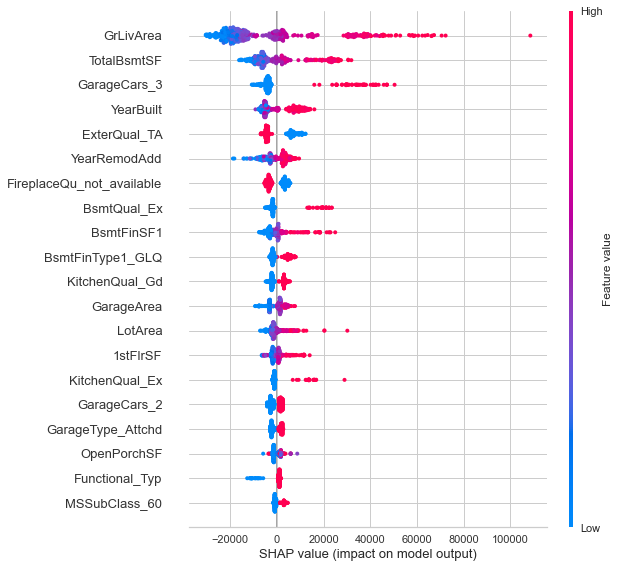

In [94]:
interpret_model(gradient)

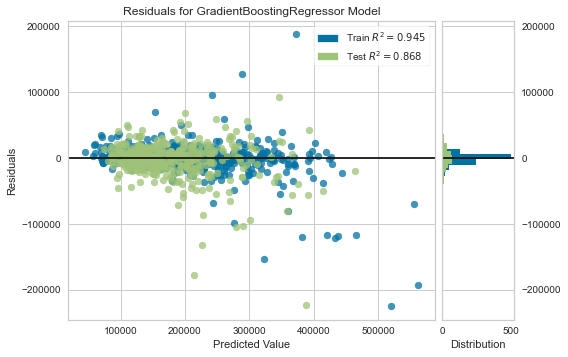

In [95]:
plot_model(gradient_tune)

In [96]:
evaluate_model(gradient)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [97]:
submission = predict_model(gradient, data=test)

In [98]:
submission

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,121609.4675
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,161533.4773
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180933.1373
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,180270.5494
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,177536.0442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,92285.2407
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,90557.7882
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,142133.2815
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,134491.6557


In [104]:
pycaretSub['Sales price'] = submission['Label']
pycaretSub.to_csv('pycaret_submission.csv', index=False)
pycaretSub.head(10)

,t,Sales price
0,NaN,121609.4675
1,NaN,161533.4773
2,NaN,180933.1373
3,NaN,180270.5494
4,NaN,177536.0442
5,NaN,169618.6060
6,NaN,166527.3845
7,NaN,160550.2996
8,NaN,186231.9591
9,NaN,125365.2996
